In [1]:
import scipy.io
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from fastai.tabular import *
from fastai.tabular.data import TabularList

In [2]:
data = scipy.io.loadmat('./data/MSdata.mat')

In [3]:
data['trainx'].shape

(463715, 90)

In [4]:
df_train = pd.DataFrame(np.hstack((data['trainx'], data['trainy'])))
df_test = pd.DataFrame(data['testx'])

In [5]:
df_train.head()

0         1         2         3         4         5         6   \
0  49.94357  21.47114  73.07750   8.74861 -17.40628 -13.09905 -25.01202   
1  48.73215  18.42930  70.32679  12.94636 -10.32437 -24.83777   8.76630   
2  50.95714  31.85602  55.81851  13.41693  -6.57898 -18.54940  -3.27872   
3  48.24750  -1.89837  36.29772   2.58776   0.97170 -26.21683   5.05097   
4  50.97020  42.20998  67.09964   8.46791 -15.85279 -16.81409 -12.48207   

         7         8        9   ...         81        82        83        84  \
0 -12.23257   7.83089 -2.46783  ...  -54.40548  58.99367  15.37344   1.11144   
1  -0.92019  18.76548  4.59210  ...  -19.68073  33.04964  42.87836  -9.90378   
2  -2.35035  16.07017  1.39518  ...   26.05866 -50.92779  10.93792  -0.07568   
3 -10.34124   3.55005 -6.36304  ... -171.70734 -16.96705 -46.67617 -12.51516   
4  -9.37636  12.63699  0.93609  ...  -55.95724  64.92712 -17.72522  -1.49237   

         85         86        87         88        89      90  
0 -23.08793   68.40795  -1.82223  -27.46348   2.26327  2001.0  
1 -32.22788   70.49388  12.04941   58.43453  26.92061  2001.0  
2  43.20130 -115.00698  -0.05859   39.67068  -0.66345  2001.0  
3  82.58061  -72.08993   9.90558  199.62971  18.85382  2001.0  
4  -7.50035   51.76631   7.88713   55.66926  28.74903  2001.0  

[5 rows x 91 columns]

In [6]:
df_test.head()

0         1         2         3         4         5         6   \
0  45.44200 -30.74976  31.78587   4.63569 -15.14894   0.23370 -11.97968   
1  52.67814  -2.88914  43.95268  -1.39209 -14.93379 -15.86877   1.19379   
2  45.74235  12.02291  11.03009 -11.60763  11.80054 -11.12389  -5.39058   
3  52.55883   2.87222  27.38848  -5.76235 -15.35766 -15.01592  -5.86893   
4  51.34809   9.02702  25.33757  -6.62537   0.03367 -12.69565  -3.13400   

        7        8        9   ...       80        81         82        83  \
0 -9.59708  6.48111 -8.89073  ... -8.84046  -0.15439  137.44210  77.54739   
1  0.31401 -4.44235 -5.78934  ... -5.74356 -42.57910   -2.91103  48.72805   
2 -1.11981 -7.74086 -3.33421  ... -4.70606 -24.22599  -35.22686  27.77729   
3 -0.31447 -5.06922 -4.62734  ... -8.35215 -16.86791  -10.58277  40.10173   
4  2.98649 -6.71750 -1.85804  ... -6.87366 -20.03371  -66.38940  50.56569   

         84        85        86        87        88       89  
0  -4.22875 -61.92657 -33.52722  -3.86253  36.42400  7.17309  
1  -3.08183  -9.38888  -7.27179  -4.00966 -68.96211 -5.21525  
2  15.38934  58.20036 -61.12698 -10.92522  26.75348 -5.78743  
3  -0.54005 -11.54746 -45.35860  -4.55694 -43.17368 -3.33725  
4   0.27747  67.05657 -55.58846  -7.50859  28.23511 -0.72045  

[5 rows x 90 columns]

In [7]:
continuous_data = list(range(0,90))
categorical_data = []
procs = [FillMissing, Categorify, Normalize]

tabular_data_test = TabularList.from_df(df_test, cat_names=categorical_data, cont_names=continuous_data, procs=procs)


tabular_data = (TabularList.from_df(df_train, path='.', cat_names=categorical_data, cont_names=continuous_data, procs=procs)
                        .split_by_rand_pct(valid_pct = 0.9, seed = 42)
                        .label_from_df(cols = 90, label_cls = FloatList)
                        .add_test(tabular_data_test)
                        .databunch(bs=1024))

[W ParallelNative.cpp:212] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:212] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:212] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:212] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:212] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNati

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


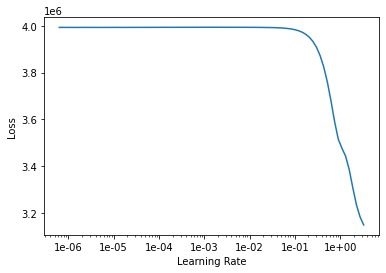

In [17]:
learn = tabular_learner(tabular_data, layers=[200,50], metrics=mae)
learn.lr_find()
learn.recorder.plot()

In [20]:
learn.fit_one_cycle(20, max_lr = 0.03)

[W ParallelNative.cpp:212] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:212] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:212] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:212] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:212] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNati

    
if w.is_alive():
      File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
if w.is_alive():    
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
assert self._parent_pid == os.getpid(), 'can only test a child process'    
AssertionErrorassert self._parent_pid == os.getpid(), 'can only test a child process': 
can only test a child processAssertionError
: can only test a child process
[W ParallelNative.cpp:212] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:212] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:212] Warning: Cannot set number of intraop threads 

    assert self._parent_pid == os.getpid(), 'can only test a child process':   File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 151, in is_alive

  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
can only test a child processif w.is_alive():
    AssertionError        
AssertionErrorassert self._parent_pid == os.getpid(), 'can only test a child process'
:   File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
assert self._parent_pid == os.getpid(), 'can only test a child process': 
assert self._parent_pid == os.getpid(), 'can only test a child process'can only test a child processcan only test a child process
    AssertionError: 
AssertionErrorcan only test a child process:

    self._shutdown_workers()Exception ignored in: Exception ignored in: 
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
<function _MultiProcessingDataLoaderIter.__del__ at 0x7f88fcaa3b00><function _MultiProcessingDataLoaderIter.__del__ at 0x7f88fcaa3b00>    if w.is_alive():

  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 151, in is_alive

    Traceback (most recent call last):
assert self._parent_pid == os.getpid(), 'can only test a child process'Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__

  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
AssertionError        : self._shutdown_workers()can only test a chil

    if w.is_alive():AssertionError    <function _MultiProcessingDataLoaderIter.__del__ at 0x7f88fcaa3b00>if w.is_alive():<function _MultiProcessingDataLoaderIter.__del__ at 0x7f88fcaa3b00><function _MultiProcessingDataLoaderIter.__del__ at 0x7f88fcaa3b00>: assert self._parent_pid == os.getpid(), 'can only test a child process'can only test a child process





  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
AssertionError    
: can only test a child processassert self._parent_pid == os.getpid(), 'can only test a child process'Traceback (most recent call last):


AssertionErrorTraceback (most recent call last):
: Traceback (most recent call last):
can only test a child process  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 151, in is_alive

  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/torch/utils/data/dataloader.py"

self._shutdown_workers()  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    <function _MultiProcessingDataLoaderIter.__del__ at 0x7f88fcaa3b00>
assert self._parent_pid == os.getpid(), 'can only test a child process'
Exception ignored in: 

  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
Traceback (most recent call last):
AssertionError<function _MultiProcessingDataLoaderIter.__del__ at 0x7f88fcaa3b00>:   File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
Traceback (most recent call last):

can only test a child process        Traceback (most recent call last):

if w.is_alive():self._shutdown_workers()  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 13

                if w.is_alive():self._shutdown_workers()if w.is_alive():if w.is_alive():

  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 151, in is_alive


  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
      File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
assert self._parent_pid == os.getpid(), 'can only test a child process'        Exception ignored in:     
assert self._parent_pid == os.getpid(), 'can only test a child process'if w.is_alive():Exception ignored in: assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError
AssertionErrorException ignored in: 
: <function _MultiProcessingDataLoaderIter.__

  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
            <function _MultiProcessingDataLoaderIter.__del__ at 0x7f88fcaa3b00>self._shutdown_workers()assert self._parent_pid == os.getpid(), 'can only test a child process'if w.is_alive():


Exception ignored in: 
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
AssertionError    <function _MultiProcessingDataLoaderIter.__del__ at 0x7f88fcaa3b00>    if w.is_alive():: Traceback (most recent call last):
assert self._parent_pid == os.getpid(), 'can only test a child process'
can only test a child 

Exception ignored in:     Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f88fcaa3b00>self._shutdown_workers()    <function _MultiProcessingDataLoaderIter.__del__ at 0x7f88fcaa3b00>Exception ignored in: 
self._shutdown_workers()Exception ignored in: Exception ignored in: 
Traceback (most recent call last):
<function _MultiProcessingDataLoaderIter.__del__ at 0x7f88fcaa3b00>Exception ignored in: 

<function _MultiProcessingDataLoaderIter.__del__ at 0x7f88fcaa3b00>Traceback (most recent call last):
<function _MultiProcessingDataLoaderIter.__del__ at 0x7f88fcaa3b00>
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
<function _MultiProcessingDataLoaderIter.__del__ at 0x7f88fcaa3b00>  File "/Library/Frameworks/Python.framewor

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f88fcaa3b00>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
Exception ignored in:     Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f88fcaa3b00><function _MultiProcessingDataLoaderIter.__del__ at 0x7f88fcaa3b00>
self._shutdown_workers()

Traceback (most recent call last):
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
      File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    if w.is_alive(

[W ParallelNative.cpp:212] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:212] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:212] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f88fcaa3b00>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f88fcaa3b00>self._shutdown_workers()

Exception ignored in: Tr

[W ParallelNative.cpp:212] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:212] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:212] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:212] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:212] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNati

[W ParallelNative.cpp:212] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:212] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:212] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:212] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:212] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNati

[W ParallelNative.cpp:212] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:212] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:212] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:212] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:212] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNati

[W ParallelNative.cpp:212] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:212] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:212] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:212] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:212] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNati

            assert self._parent_pid == os.getpid(), 'can only test a child process'assert self._parent_pid == os.getpid(), 'can only test a child process'assert self._parent_pid == os.getpid(), 'can only test a child process'


AssertionErrorAssertionErrorAssertionError: : : can only test a child processcan only test a child process
can only test a child process

[W ParallelNative.cpp:212] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:212] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:212] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:212] Warning: Cannot 

self._shutdown_workers()    
self._shutdown_workers()  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers

      File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
if w.is_alive():  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 151, in is_alive

  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
        assert self._parent_pid == os.getpid(), 'can only test a child process'assert self._parent_pid == os.getpid(), 'can only test a child process'

AssertionErrorAssertionError: : can only test a child process
can only test a child process
[W ParallelNative.cpp:212] Warning: Cannot set number of intraop threads after parallel work has started or afte


assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f88fcaa3b00>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
<function _MultiProcessingDataLoaderIter.__del__ at 0x7f88fcaa3b00>    self._shutdown_workers()
Traceback (most recent call last):

  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():    self._shutdown_workers()

  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 151, in is_al

        <function _MultiProcessingDataLoaderIter.__del__ at 0x7f88fcaa3b00>AssertionError                assert self._parent_pid == os.getpid(), 'can only test a child process'self._shutdown_workers()
assert self._parent_pid == os.getpid(), 'can only test a child process': if w.is_alive():
if w.is_alive():
Traceback (most recent call last):
can only test a child process  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__

AssertionError
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers

assert self._parent_pid == os.getpid(), 'can only test a child process':   File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
        can only test a child process  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessin

if w.is_alive():  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
self._shutdown_workers()    if w.is_alive():    assert self._parent_pid == os.getpid(), 'can only test a child process'
    
    
self._shutdown_workers()
self._shutdown_workers()  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
assert self._parent_pid == os.getpid(), 'can only test a child process'self._shutdown_workers()  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 151, in is_alive

AssertionError

    
        :   File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdo

<function _MultiProcessingDataLoaderIter.__del__ at 0x7f88fcaa3b00>  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
Traceback (most recent call last):
      File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers

      File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
            assert self._parent_pid == os.getpid(), 'can only test a child process'    assert self._parent_pid == os.getpid(), 'can only test a child process'Traceback (most recent c

<function _MultiProcessingDataLoaderIter.__del__ at 0x7f88fcaa3b00>    Exception ignored in: 
if w.is_alive():<function _MultiProcessingDataLoaderIter.__del__ at 0x7f88fcaa3b00>Traceback (most recent call last):

  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
    self._shutdown_workers()
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
AssertionError
:       File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
can only test a child processself._shutdown_workers()
    
  File "/Li

In [10]:
preds, targets = learn.get_preds(DatasetType.Test)

[W ParallelNative.cpp:212] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:212] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:212] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:212] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:212] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNati

In [11]:
labels = [p[0].data.item() for p in preds]
test_id = list(range(1,51631))
submission = pd.DataFrame({'dataid': test_id, 'prediction': labels})
submission.to_csv('./outputs/output_NN_bs_512_lr_0.03.csv', index=False)